[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/IGES-Geospatial/globe-observer-utils/blob/main/notebooks/LCFiltering.ipynb)

# Import go_utils

This cell should only be run for Google Colab Notebooks or if go_utils is not installed on your local computer. Note that Google Colab Users will have to restart the environment after this is run. 

In [1]:
!pip install go_utils

     |████████████████████████████████| 43.0 MB 1.2 MB/s 
     |████████████████████████████████| 3.5 MB 45.5 MB/s 
     |████████████████████████████████| 503 kB 62.7 MB/s 
  Using cached keyring-21.7.0-py3-none-any.whl (32 kB)
  Using cached lerc-0.1.0-py3-none-any.whl
  Using cached ujson-5.1.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43 kB)
  Using cached jupyterlab-3.3.2-py3-none-any.whl (8.7 MB)
  Using cached python_certifi_win32-1.6-py2.py3-none-any.whl (7.2 kB)
  Using cached pyshp-2.2.0-py3-none-any.whl (44 kB)
  Using cached geomet-0.3.0-py3-none-any.whl (28 kB)
  Using cached requests_toolbelt-0.9.1-py2.py3-none-any.whl (54 kB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached jeepney-0.8.0-py3-none-any.whl (48 kB)
  Using cached SecretStorage-3.3.1-py3-none-any.whl (15 kB)
  Using cached cryptography-36.0.2-cp36-abi3-manylinux_2_24_x86_64.whl (3.6 MB)
  Using cached jupyter_server-1.16.0-py3-none-any.whl (343 kB)
  Using cach

# Get Land Cover Data

In [3]:
from go_utils import get_api_data
from go_utils.constants import landcover_protocol

lc_df = get_api_data(landcover_protocol, end_date="2022-03-30")

In [4]:
lc_df

,lc_measuredDate,lc_createDate,lc_updateDate,lc_publishDate,lc_organizationId,lc_organizationName,lc_siteId,lc_siteName,lc_countryName,lc_countryCode,...,lc_SouthPrimary,lc_SouthSecondary,lc_WestPrimary,lc_WestSecondary,lc_PrimaryClassification,lc_SecondaryClassification,lc_PrimaryPercentage,lc_SecondaryPercentage,lc_SubCompletenessScore,lc_CumulativeCompletenessScore
0,2021-10-10,2021-10-10 14:25:04,2021-10-10 14:25:04,2022-01-16 21:05:00,104192,IES Marques de Suanzes,4237,01 School Location: SCS-01,Spain,ESP,...,NA,NA,NA,NA,NA,NA,0.0,0.0,0.0,0.91
1,2018-03-02,2021-05-23 17:27:12,2021-05-23 17:27:12,2021-06-17 21:00:23,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NA,NA,NA,NA,NA,NA,0.0,0.0,0.6,0.92
2,2018-03-03,2021-05-23 17:27:12,2021-05-23 17:27:12,2021-06-17 21:00:23,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NA,NA,NA,NA,NA,NA,0.0,0.0,0.6,0.92
3,2018-03-04,2021-05-23 17:27:12,2021-05-23 17:27:12,2021-06-17 21:00:23,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NA,NA,NA,NA,NA,NA,0.0,0.0,0.6,0.92
4,2018-03-04,2021-05-23 17:27:12,2021-05-23 17:27:12,2021-06-17 21:00:23,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NA,NA,NA,NA,NA,NA,0.0,0.0,0.6,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26380,2022-03-30,2022-04-01 18:40:05,2022-04-04 13:40:28,2022-04-04 13:50:00,17043304,United States of America Citizen Science,272021,04WEE830156,United States,USA,...,"Urban, Roads and Parking","Urban, Commercial Property, Barren, Dirt/Other","Barren, Dirt/Other","Open Water, Marine","Open Water, Marine","Barren, Dirt/Other",30.0,25.0,1.0,0.98
26381,2022-03-30,2022-03-31 16:30:04,2022-03-31 19:20:10,2022-04-03 22:26:23,17043304,United States of America Citizen Science,272022,04WEE790127,United States,USA,...,"Open Water, Marine",NA,"Open Water, Marine",NA,"Open Water, Marine",NA,100.0,0.0,1.0,0.98
26382,2022-03-29,2022-04-03 13:40:03,2022-04-04 13:40:35,2022-04-04 13:50:00,17453129,Italy Citizen Science,272278,33TTG564829,Italy,ITA,...,"Trees, Closely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass","Trees, Closely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass","Trees, Closely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass",70.0,20.0,1.0,0.98
26383,2022-03-29,2022-04-03 13:45:07,2022-04-04 13:40:32,2022-04-04 13:50:00,17453129,Italy Citizen Science,272280,33TTG573826,Italy,ITA,...,"Herbaceous/Grassland, Short Grass","Trees, Closely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass","Trees, Closely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass","Trees, Closely Spaced, Deciduous - Broad Leaved",70.0,60.0,1.0,0.98


# Filter data

We will now use a qa filter method to get all records that have all classifications filled out and all photos taken. 

In [5]:
from go_utils.lc import qa_filter

filtered_lc_df = qa_filter(lc_df, has_all_classifications=True, has_all_photos=True)

In [6]:
filtered_lc_df

,lc_measuredDate,lc_createDate,lc_updateDate,lc_publishDate,lc_organizationId,lc_organizationName,lc_siteId,lc_siteName,lc_countryName,lc_countryCode,...,lc_SouthPrimary,lc_SouthSecondary,lc_WestPrimary,lc_WestSecondary,lc_PrimaryClassification,lc_SecondaryClassification,lc_PrimaryPercentage,lc_SecondaryPercentage,lc_SubCompletenessScore,lc_CumulativeCompletenessScore
278,2020-12-03,2021-05-23 17:39:52,2021-05-23 17:39:52,2021-10-03 21:00:02,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,"Herbaceous/Grassland, Short Grass","Urban, Roads and Parking","Herbaceous/Grassland, Short Grass, Urban, Resi...","Trees, Loosely Spaced, Deciduous - Broad Leave...","Herbaceous/Grassland, Short Grass","Urban, Residential Property",60.0,40.0,1.0,0.98
293,2019-04-26,2021-05-23 17:29:19,2021-05-23 17:29:19,2021-05-23 17:41:46,12993805,Canyon Weather,35822,11SMT309761,United States,USA,...,"Herbaceous/Grassland, Short Grass, Urban, Resi...","Trees, Loosely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass","Trees, Loosely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass","Trees, Loosely Spaced, Deciduous - Broad Leaved",62.5,60.0,1.0,0.98
302,2019-06-07,2021-05-23 17:30:05,2021-12-05 01:55:08,2021-12-05 02:00:00,17043304,United States of America Citizen Science,36326,18SUJ406176,United States,USA,...,"Herbaceous/Grassland, Short Grass, Urban, Road...","Trees, Closely Spaced, Evergreen - Needle Leaved","Trees, Closely Spaced, Evergreen - Needle Leaved","Trees, Closely Spaced, Deciduous - Broad Leaved","Trees, Closely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass, Urban, Road...",35.0,25.0,1.0,0.98
310,2020-10-23,2021-05-23 17:39:11,2021-05-23 17:39:11,2021-10-03 21:00:02,226967,Montana State University,36500,12TVR966575,United States,USA,...,"Cultivated, Athletic Field, Golf Course, Cemetery",NA,"Cultivated, Athletic Field, Golf Course, Cemetery",NA,"Cultivated, Athletic Field, Golf Course, Cemetery",NA,100.0,0.0,1.0,0.98
311,2020-11-04,2021-05-23 17:39:30,2021-05-23 17:39:30,2021-10-03 21:00:02,226967,Montana State University,36500,12TVR966575,United States,USA,...,"Cultivated, Athletic Field, Golf Course, Cemetery",NA,"Cultivated, Athletic Field, Golf Course, Cemetery",NA,"Cultivated, Athletic Field, Golf Course, Cemetery",NA,100.0,0.0,1.0,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26370,2022-03-27,2022-03-28 05:35:07,2022-03-28 05:35:07,2022-04-03 22:26:23,32402168,"College of Earth, Ocean, Atmospheric Sciences ...",271715,15SUV372937,United States,USA,...,"Trees, Closely Spaced, Deciduous - Broad Leaved",NA,"Trees, Closely Spaced, Deciduous - Broad Leaved","Barren, Dirt/Other, Urban, Roads and Parking","Herbaceous/Grassland, Short Grass, Cultivated,...","Trees, Closely Spaced, Deciduous - Broad Leaved",45.0,20.0,1.0,0.98
26380,2022-03-30,2022-04-01 18:40:05,2022-04-04 13:40:28,2022-04-04 13:50:00,17043304,United States of America Citizen Science,272021,04WEE830156,United States,USA,...,"Urban, Roads and Parking","Urban, Commercial Property, Barren, Dirt/Other","Barren, Dirt/Other","Open Water, Marine","Open Water, Marine","Barren, Dirt/Other",30.0,25.0,1.0,0.98
26381,2022-03-30,2022-03-31 16:30:04,2022-03-31 19:20:10,2022-04-03 22:26:23,17043304,United States of America Citizen Science,272022,04WEE790127,United States,USA,...,"Open Water, Marine",NA,"Open Water, Marine",NA,"Open Water, Marine",NA,100.0,0.0,1.0,0.98
26382,2022-03-29,2022-04-03 13:40:03,2022-04-04 13:40:35,2022-04-04 13:50:00,17453129,Italy Citizen Science,272278,33TTG564829,Italy,ITA,...,"Trees, Closely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass","Trees, Closely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass","Trees, Closely Spaced, Deciduous - Broad Leaved","Herbaceous/Grassland, Short Grass",70.0,20.0,1.0,0.98


# Diagnostic Plots

We can then use plotting methods to quickly and visually verify that the filtering worked.

The `Valid Photo Count` graph shows that all entries have all 6 photos, the `SubCompleteness Scores` shows that all classifications are filled out.

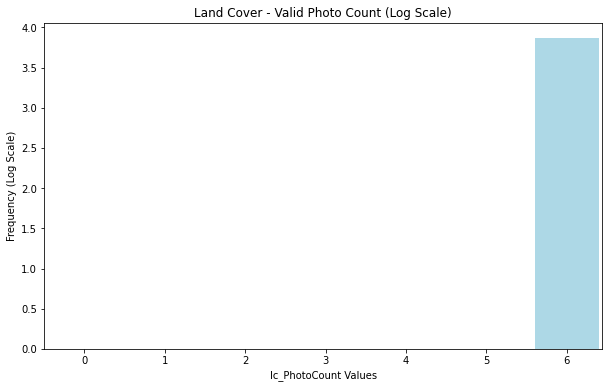

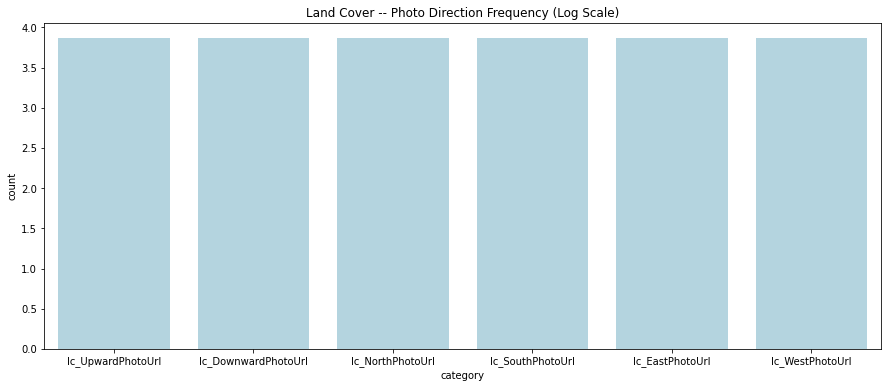

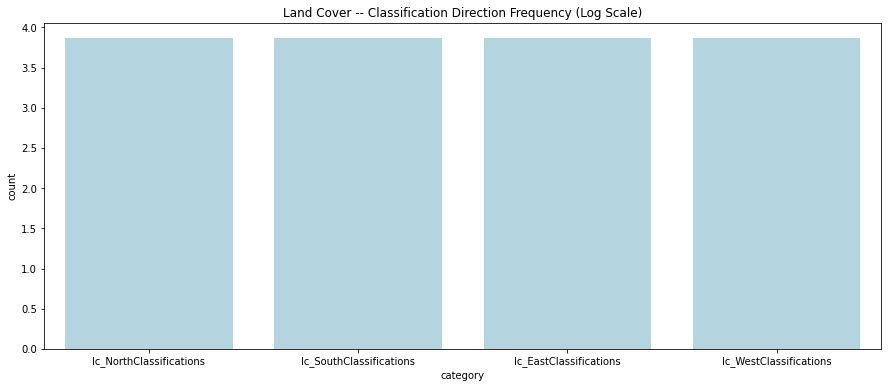

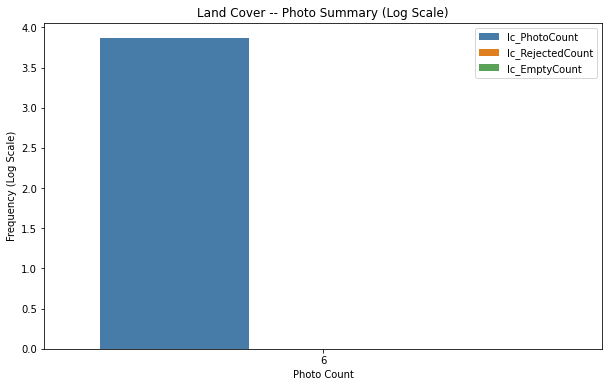

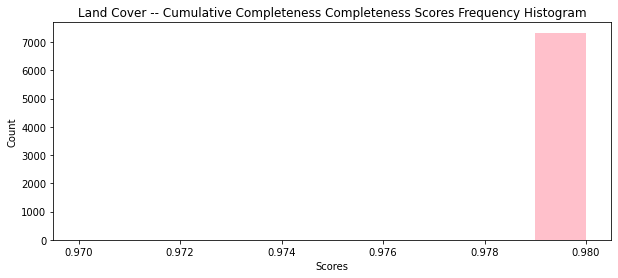

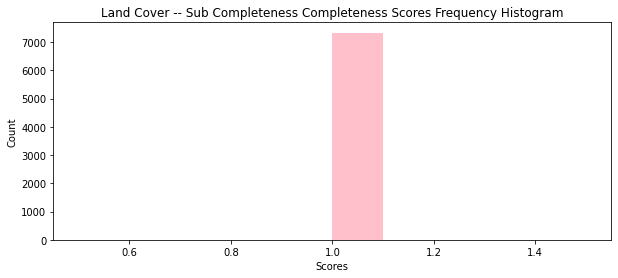

In [7]:
%matplotlib inline
from go_utils.lc import diagnostic_plots

diagnostic_plots(filtered_lc_df)

# Save as CSV

Now that we know we have the data we want, we can save it as a csv

In [10]:
filtered_lc_df.to_csv("LC_Filtered.csv")


In [12]:
from google.colab import files
files.download("LC_Filtered.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>